# Assignment 1

## A1 Part 1: Visualizing patterns in the data

In [17]:
# Import libaries
import pandas as pd
from datetime import datetime
import numpy as np
import calmap
import matplotlib.pyplot as plot
!pip install plotly==5.13.0
import plotly.express as px
from urllib.request import urlopen
import json

# Import SF data into a dataframe and exclude the crimedata from 2018
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

# Changing formatting in 'Date' and 'Time' columns
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Excluding 2018 crimedata from the dataframe
df = df.loc[(df["Date"] >= '2003-01-01') & (df["Date"] < '2018-01-01')]

# Defining focuscrime variable and creating a new dataframe with the focuscrimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 
                   'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 
                   'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

df_focuscrimes = df[df['Category'].isin(focuscrimes)].copy()

# Add "Hour" coloum to the dataframe
df_focuscrimes['Hour'] = df_focuscrimes['Time'].dt.hour

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 2.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0


### Weekly patterns - Barplot

In [2]:
# Defining barplot colors
c1 = (0.5,0.1,0.5,0.6) 
c2 = (0.1,0.3,0.6,0.6)
c3 = (0.2,0.2,0.5,0.6)
c4 = (0.1,0.3,0.4,0.6)
c5 = (0.0,0.0,0.2,0.6)
c6 = (0.5,0.7,0.6,0.6)
c7 = (0.2,0.1,0.2,0.6)
c8 = (0.1,0.3,0.1,0.6)
c9 = (0.5,0.1,0.1,0.6)
c10 = (0.3,0.6,0.1,0.6)
c11 = (0.5,0.3,0.1,0.6)
c12 = (0.5,0.8,0.1,0.6)
c13 = (0.5,0.5,0.1,0.6)
c14 = (0.5,0.9,0.6,0.6)

color_graph = (c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14)

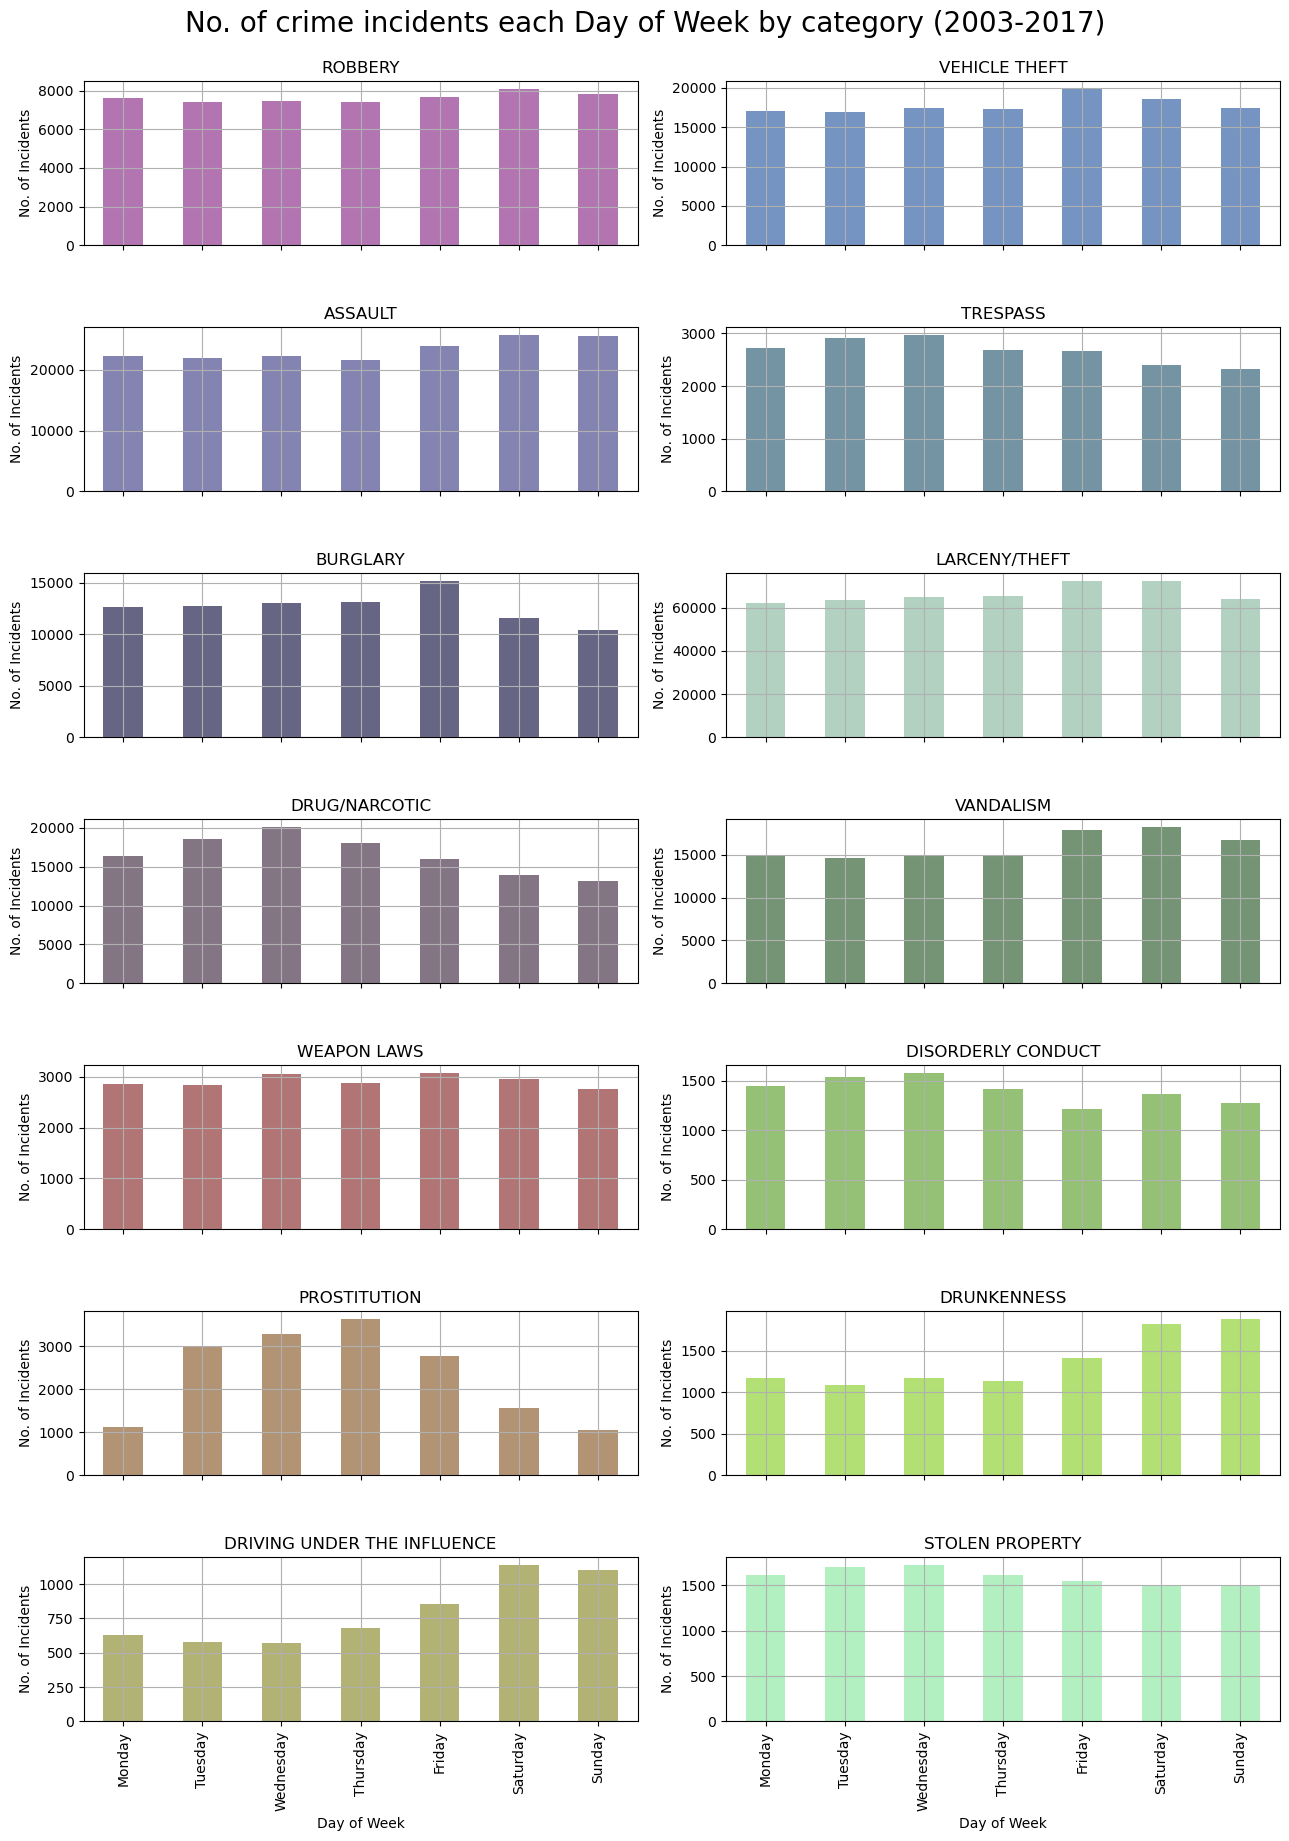

In [7]:
# Add numeric "Weekday" column to the dataframe (0=Monday, 1=Tuesday, 2=Wednesday, 3=Thursday, 4=Friday, 5=Saturday, 6 = Sunday)
df_focuscrimes['Weekday'] = df_focuscrimes['Date'].dt.weekday

# Create a list of categories to plot
categories = df_focuscrimes['Category'].unique()

# Create subplots (7x2) for each focuscrime
fig, axes = plot.subplots(nrows=7, ncols=2, figsize=(13,18), sharex=True) 

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df_focuscrimes[df_focuscrimes['Category'] == category].groupby(['Weekday']).size().plot(kind='bar', ax=ax, color=color_graph[i], grid=True)
    ax.set_title(category)
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('No. of Incidents')
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig.tight_layout()

# Add subplot title
fig.suptitle('No. of crime incidents each Day of Week by category (2003-2017)', fontsize = 20, x = 0.5, y = 1.02)
plot.subplots_adjust(hspace=0.5)

# Show the plot
plot.show()


The weekly patterns of the crime data reveals a trend of increased criminal activity during the weekends, particularly the form of incidents involving drunkenness and theft/robbery. 

Interestingly, the data also shows a decrease in incidents of drug/narcotic and prostitution offenses during the weekend, with higher incidence rates observed from Tuesdays to Thursdays.


### Monthly patterns - Barplot

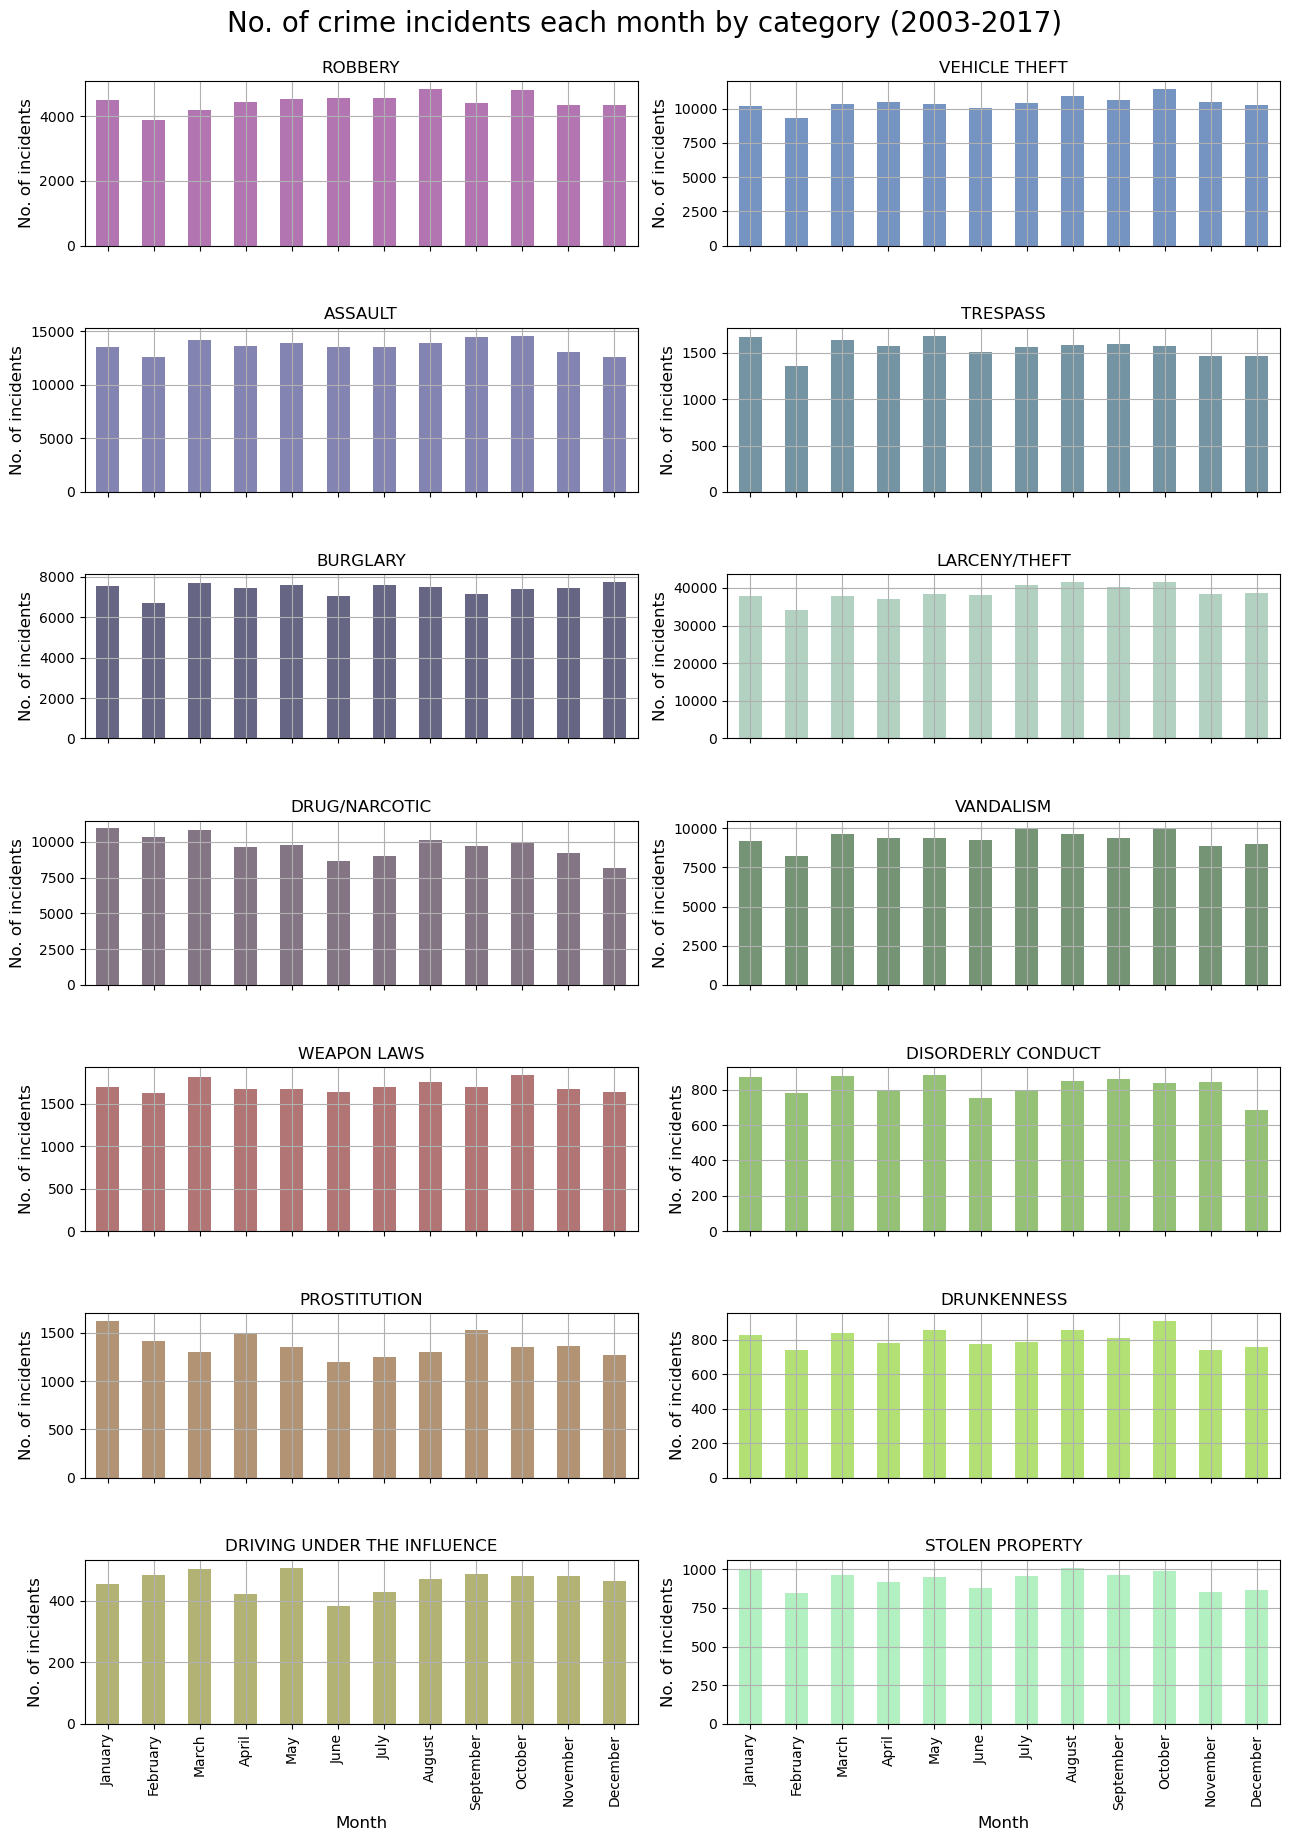

In [8]:
# Add "Month" coloum to the dataframe
df_focuscrimes['Month'] = df_focuscrimes['Date'].dt.month

# Create a list of categories to plot
categories = df_focuscrimes['Category'].unique()

# Create subplots (7x2) for each focuscrime
fig, axes = plot.subplots(nrows=7, ncols=2, figsize=(13,18), sharex=True) 

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df_focuscrimes[df_focuscrimes['Category'] == category].groupby(['Month']).size().plot(kind='bar', ax=ax, color=color_graph[i], grid=True)
    ax.set_title(category)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('No. of incidents', fontsize=12)
    ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

fig.tight_layout()

# Add subplot title
fig.suptitle('No. of crime incidents each month by category (2003-2017)', fontsize = 20, x = 0.5, y = 1.02)
plot.subplots_adjust(hspace=0.5)

# Show the plot
plot.show()

The mothly patterns of the crime data reveals a significant gradual decrease in criminal activity during November and December for all crimetypes, except Burglary. The reason for that could for example be, that people might be more focused on the holiday season and spending time with their families, leading to less criminal activity. 

Suprisely, there is a lower incidence of drunkenness incidents during November and December, this is certainly surprising given the increased prevalence of parties and holiday celebrations during this time of year. However, it's possible that people are more aware of the dangers of drunk driving and are taking extra precautions to avoid getting behind the wheel while under the influence.

### 24-hour cycle - Barplot

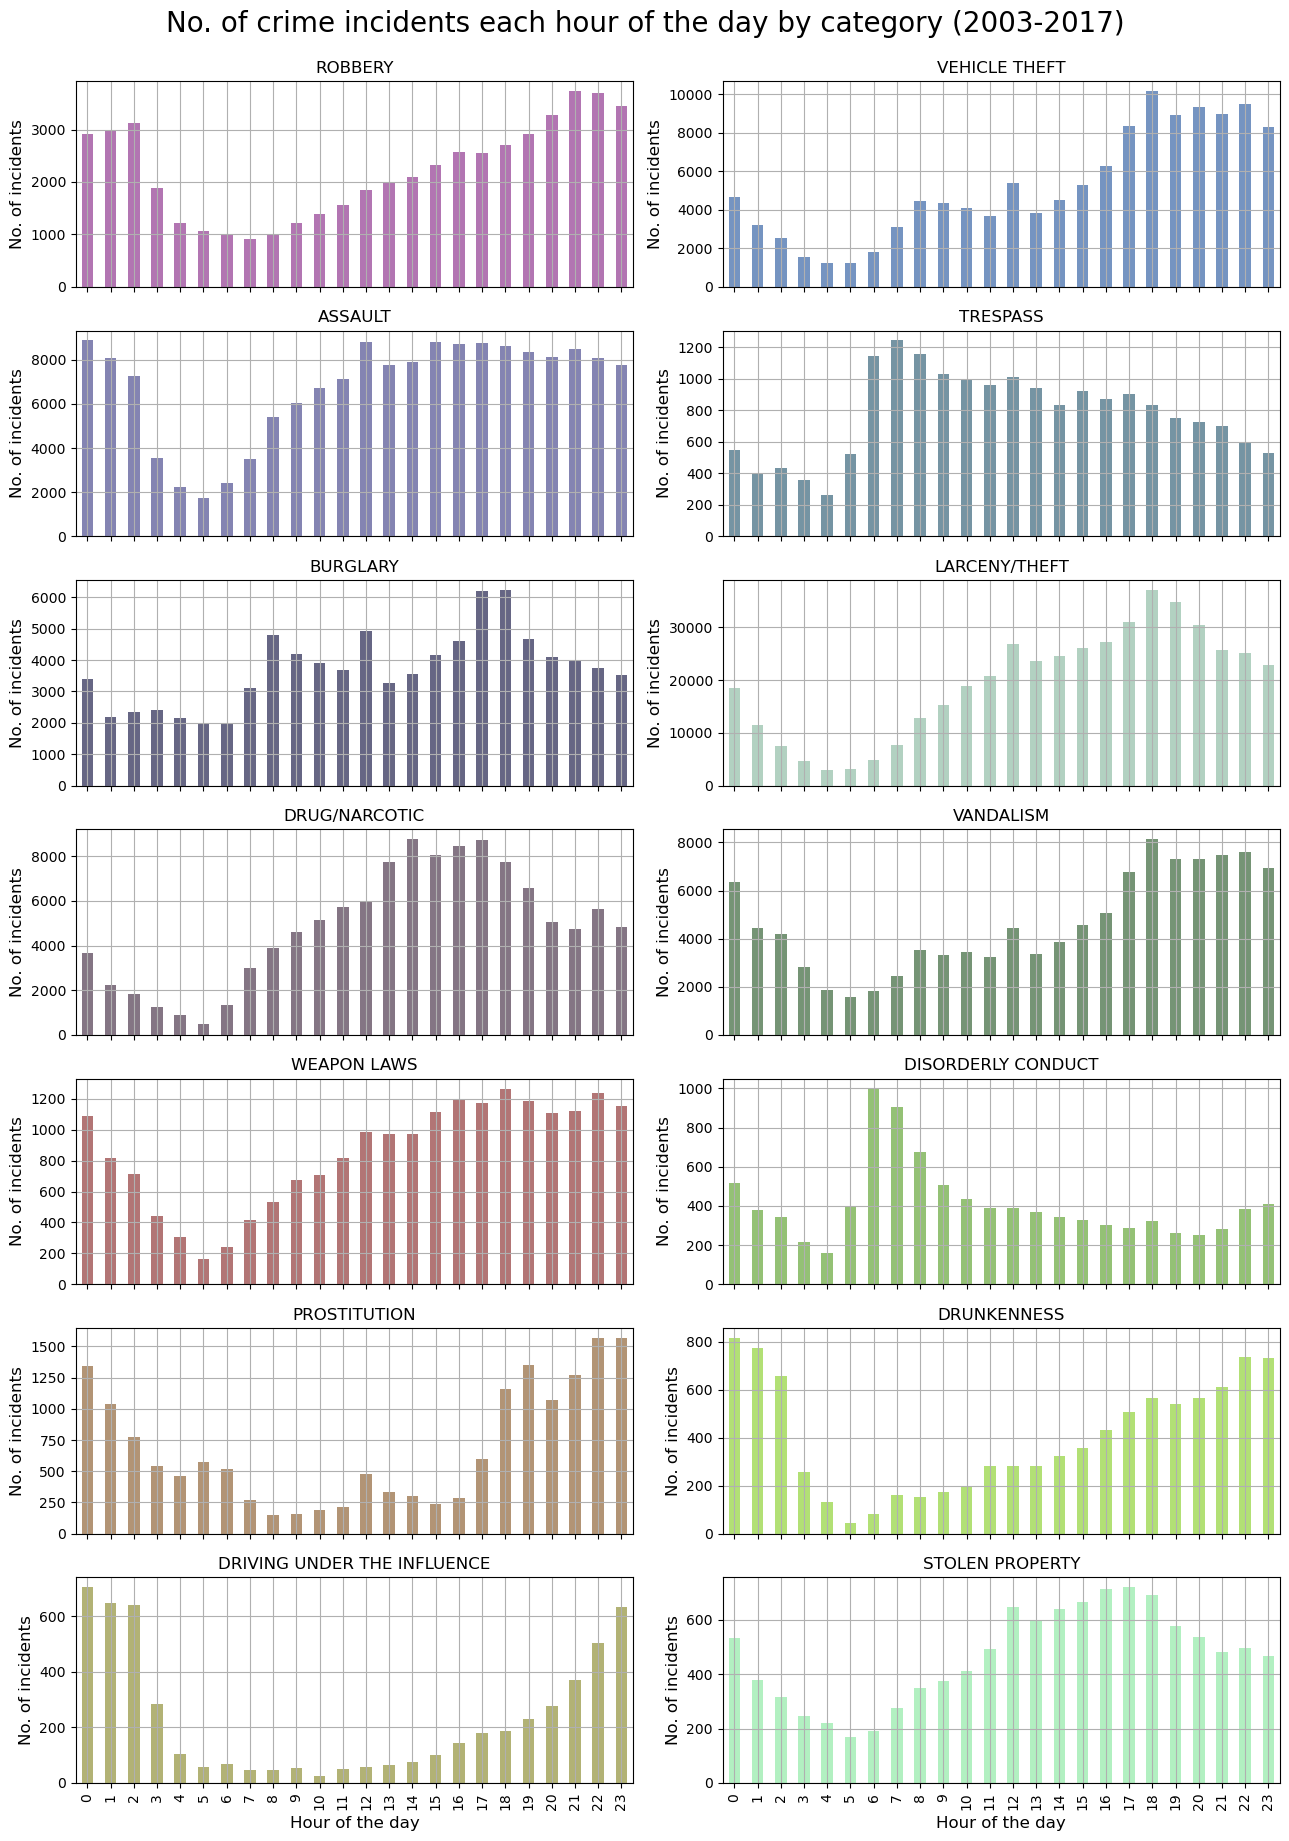

In [9]:
# Add a "Hour" coloum to the dataframe
df_focuscrimes['Hour'] = df_focuscrimes['Time'].dt.hour

# Create a list of categories to plot
categories = df_focuscrimes['Category'].unique()

# Create subplots (7x2) for each focuscrime
fig, axes = plot.subplots(nrows=7, ncols=2, figsize=(13,18), sharex=True)

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df_focuscrimes[df_focuscrimes['Category'] == category].groupby(['Hour']).size().plot(kind='bar', ax=ax, color=color_graph[i], grid=True)
    ax.set_title(category)
    ax.set_xlabel('Hour of the day', fontsize=12)
    ax.set_ylabel('No. of incidents', fontsize=12)

fig.tight_layout()

# Add subplot title
fig.suptitle('No. of crime incidents each hour of the day by category (2003-2017)', fontsize = 20, x = 0.5, y = 1.02)
#fed overskrift: ,fontweight="bold"

#Show the subplot
plot.show()

The hourly patterns of the crime data indicates an upward trend in the hourly distribution of most crime types, with the majority of incidents occurring during the afternoon and nighttime hours. 

Disorderly conduct incidents exhibit a peak during the early morning hours from 06:00-08:00, which may be associated with people rushing to work via car, train, or bicycle. The incidence of disorderly conduct then gradually decreases throughout the day. Similarly, trespass incidents follow the same pattern, suggesting that certain crime types may be more prevalent during specific times of the day.

### 168 hours pattern - Barplot

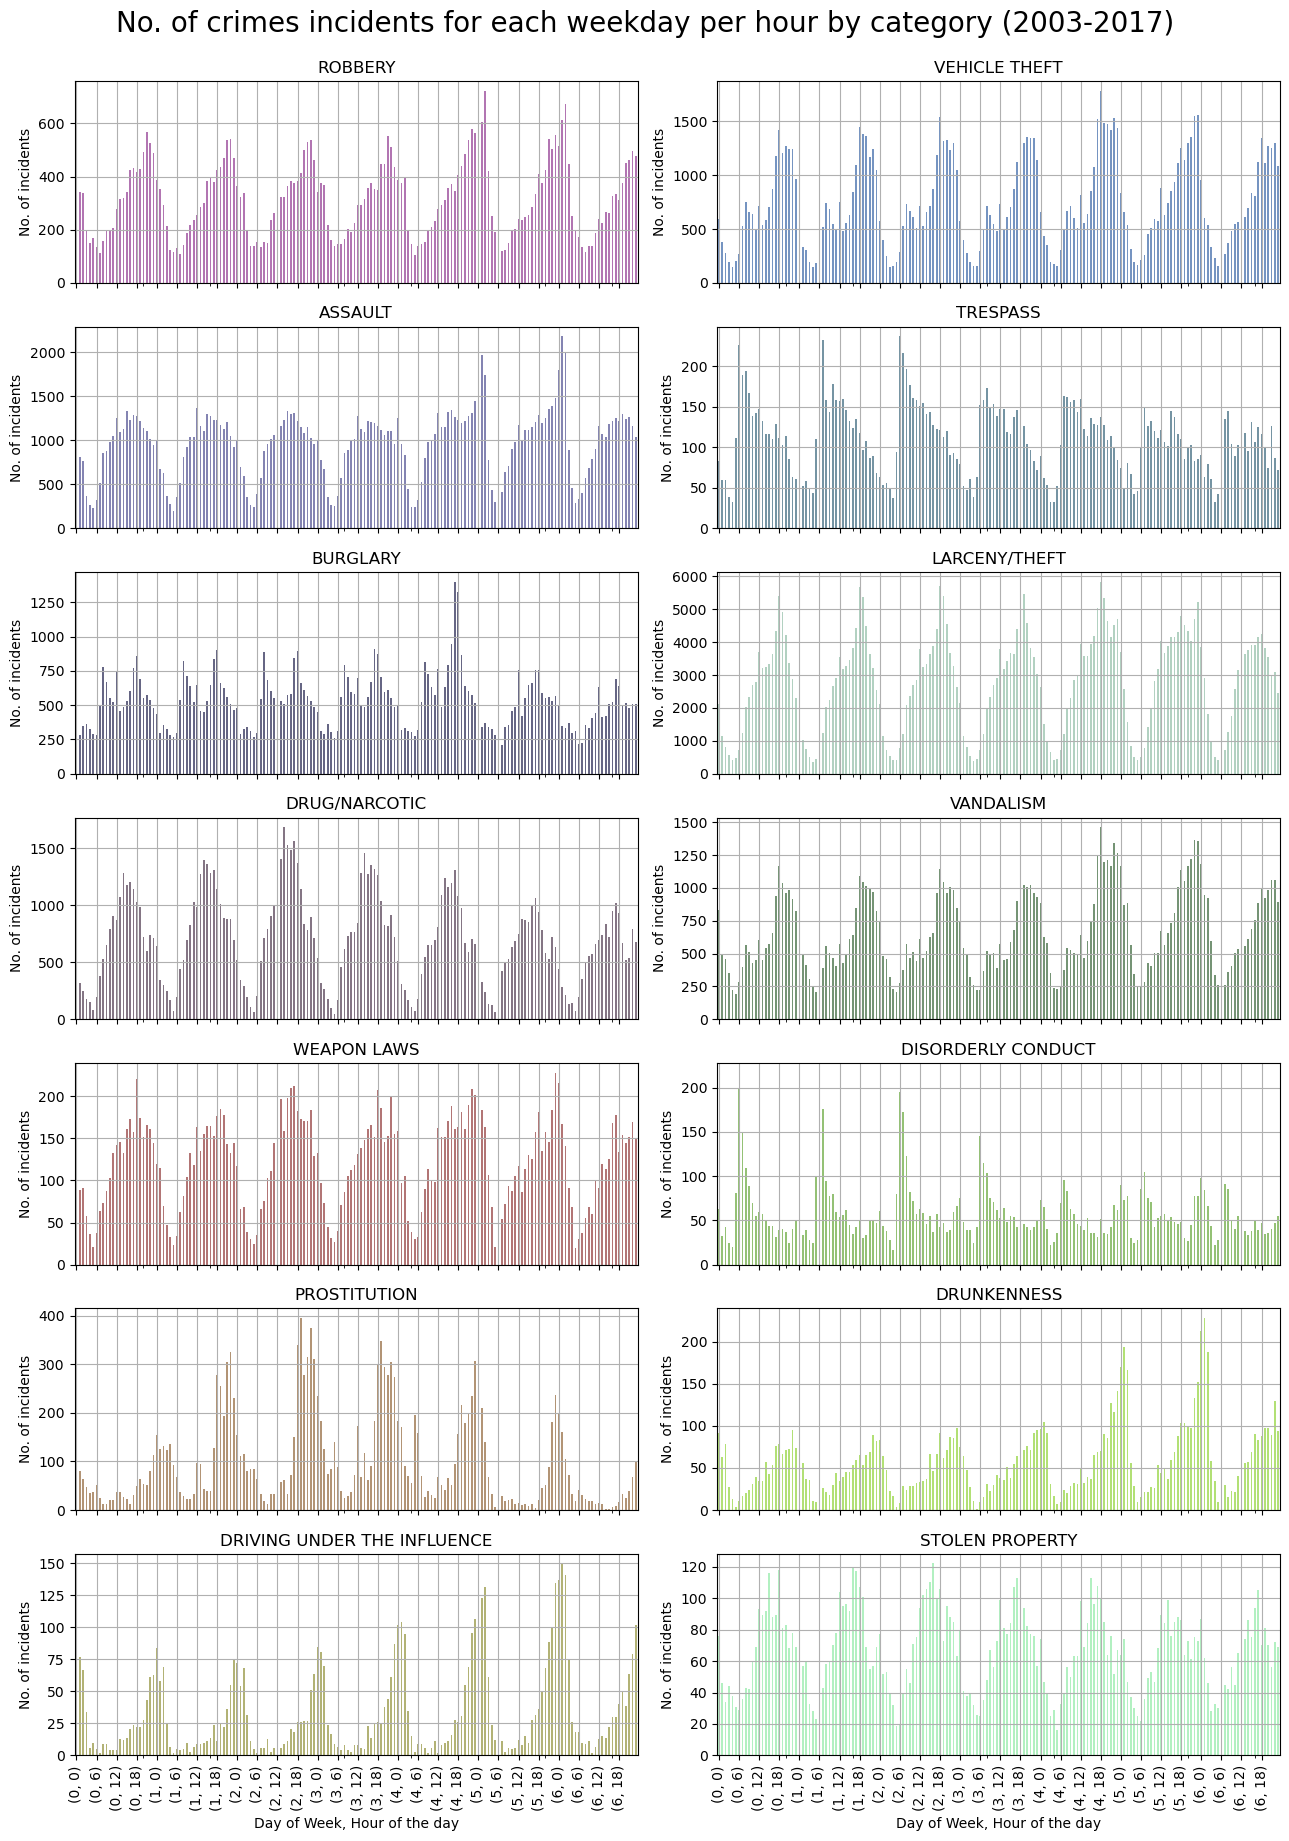

In [11]:
# Convert the 'Date' column to a datetime series
df_focuscrimes['Date'] = pd.to_datetime(df_focuscrimes['Date'])

# Add new "Weekday" column with the numeric weekday values (0=Monday, 1=Tuesday, 2=Wednesday, 3=Thursday, 4=Friday, 5=Saturday, 6=Sunday)
df_focuscrimes['Weekday'] = df_focuscrimes['Date'].dt.weekday

# Create a list of categories to plot
categories = df_focuscrimes['Category'].unique()

# Create subplots (7x2) for each focuscrime
fig, axes = plot.subplots(nrows=7, ncols=2, figsize=(13,18), sharex=True)

# Create a list of positions for every other day of the week
weekday_positions = [x*6 for x in range(28)]

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df_focuscrimes[df_focuscrimes['Category'] == category].groupby(['Weekday','Hour']).size().plot(kind='bar', ax=ax, color=color_graph[i], grid=True)
    ax.set_title(category)
    ax.set_xlabel('Day of Week, Hour of the day')
    ax.set_ylabel('No. of incidents')
    ax.set_xticks(weekday_positions)

    plot.xticks()
   
fig.tight_layout()

# Add subplot title
fig.suptitle('No. of crimes incidents for each weekday per hour by category (2003-2017)', fontsize = 20, x = 0.5, y = 1.02)
#fed overskrift: ,fontweight="bold"

#Show the subplot
plot.show()

These observations align with some common assumptions and theories about human behavior and social norms. For instance, it is well-known that many people tend to drink alcohol more heavily on weekends, when they have fewer obligations and more opportunities to socialize. This can lead to an increase in drunk driving and disorderly conduct. Similarly, the fact that drug use tends to be higher during the week could be attributed to the fact that many people use drugs as a way to cope with stress or to enhance their performance at work or school.

As for the increase in robbery and theft on Friday evenings, this could be due to a number of factors. For example, people may be more likely to go out and socialize on Friday nights, leaving their homes and cars unattended. Additionally, many businesses may close early on Fridays, which could make them more vulnerable to theft.

As for the increase in disorderly conduct from monday to wendnsday in the early morning hours, could be due to that people are more stressed and rushed during the early morning hours in the beginning of the week. As the week progresses and people start to feel more relaxed and less pressure, the number of incidents may decrease. Additionally, as the weekend approaches, people may be looking forward to it and may be less likely to engage in disruptive or disorderly behavior.

### Calandar plot for "DRUG/NARCOTIC" 

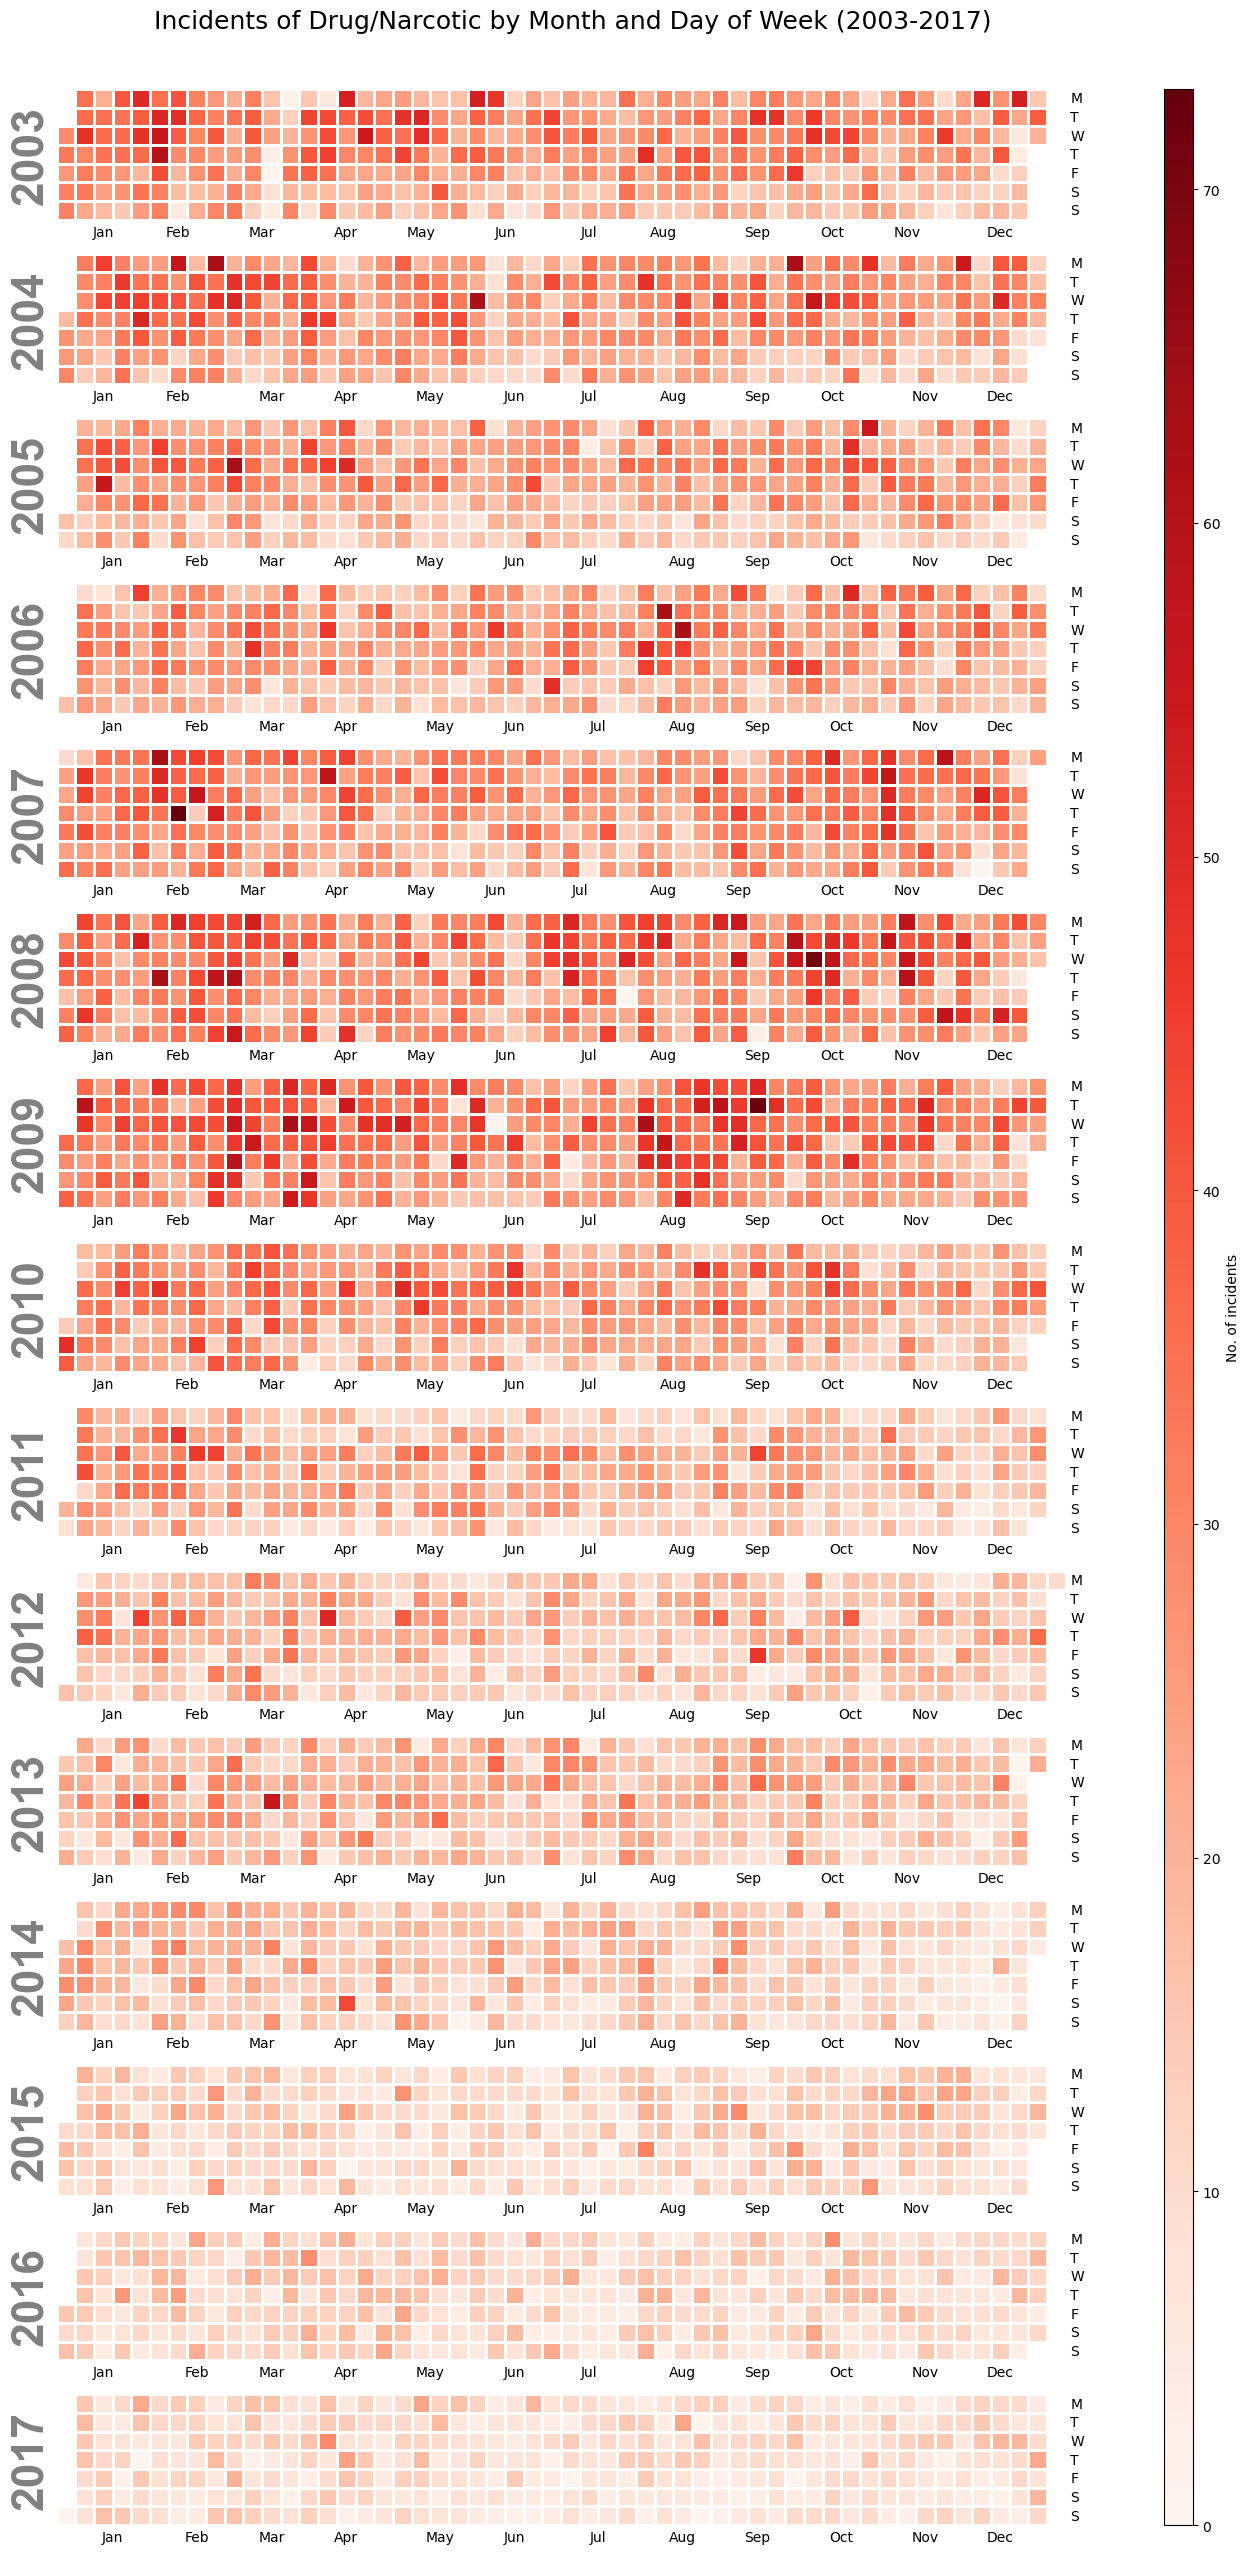

In [14]:
# New dataframe with "DRUG/NARCOTIC" as crimetype
df_drug = df_focuscrimes[df_focuscrimes['Category']=='DRUG/NARCOTIC'].copy()

# Aggregate number of DRUG/NARCOTIC incidents by day
daily_counts = df_drug.groupby([df_drug.Date.dt.date]).size()

# Create a Series with daily counts for the entire time period (2003-2017)
all_days = pd.date_range(start='2003-01-01', end='2017-12-31',freq='D')
events = pd.Series(index=all_days, data=0)
events.loc[daily_counts.index] = daily_counts.values

# Create a calendar heatmap as subplot for year 2003-2017
fig, ax = calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6],
                    fillcolor='grey',
                    fig_kws=dict(figsize=(20, 25)))

fig.suptitle('Incidents of Drug/Narcotic by Month and Day of Week (2003-2017)', fontsize=18,y=1.02, x=0.5) 

# Create a colorbar
cbar = plot.colorbar(ax[0].get_children()[1], ax=ax, orientation='vertical', aspect=85, fraction =0.2)
cbar.set_label('No. of incidents')

plot.show()

The calendar plot for DRUG/NARCOTIC incidents reveals a general downward trend in the number of incidents from 2003 to 2017. However, there is a noticeable peak in the number of incidents between 2007 and 2009, indicating a possible surge in drug-related criminal activity during this period.

The overall downward trend in DRUG/NARCOTIC incidents suggests that interventions aimed at reducing drug demand, supply, and consumption may have contributed to this positive trend.

### Polar plot for "PROSTITUTION"

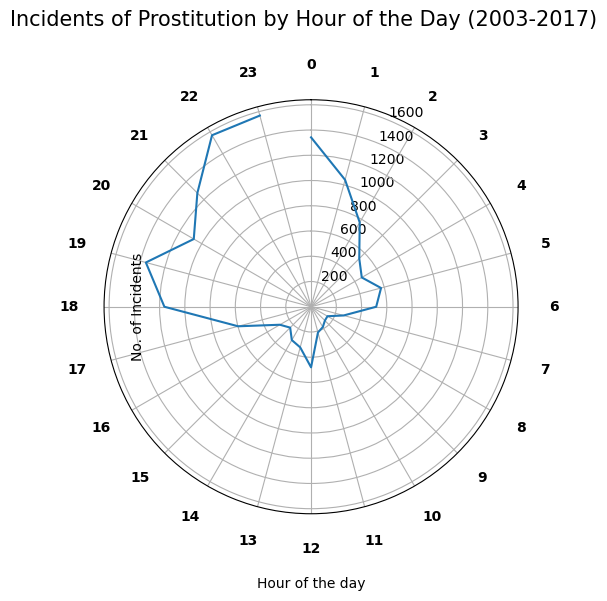

In [16]:
# New dataframe with "PROSTITUTION" as crimetype
data_pros = df_focuscrimes[df_focuscrimes['Category']=='PROSTITUTION'].copy()

# Create a list of incident counts for each hour of the day
incident_counts = data_pros.groupby('Hour').size().tolist()

# Convert the incident counts to radius values
radius_values = np.array(incident_counts)

# Convert the time in each segment to angle values
angle_values = np.linspace(0, 2*np.pi, len(incident_counts), endpoint=False)

# Plot the polar graph
fig = plot.figure(figsize=(6, 6))

# Set the title and y-axis label
fig.suptitle("Incidents of Prostitution by Hour of the Day (2003-2017)", fontsize=15, y=0.95, x=0.5)
fig.subplots_adjust(top=0.8)

ax = fig.add_subplot(111, polar=True)

# Plot the data
ax.plot(angle_values, radius_values)
ax.set_ylabel("No. of Incidents")
ax.yaxis.set_label_coords(0.1, 0.5)

# Set the zero location and direction of the polar plot
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Add the hour labels and make them bold
hours = np.arange(24)
angle_ticks = np.linspace(0, 2*np.pi, len(hours), endpoint=False)
ax.set_xticks(angle_ticks)

tick_labels = ax.set_xticklabels(hours)
for label in tick_labels:
    label.set_weight('bold')

# Add position and title to the hour labels
ax.tick_params(axis='x', pad=15, labelsize=10)
ax.set_xlabel("Hour of the day", labelpad=15)

plot.show()

The hourly pattern of PROSTITUTION incidents reveals a significant upward trend in the hourly distribution, with a higher incidence during the evening and nighttime. The hourly trend suggests that the risk of prostitution-related criminal activity is particularly high during these hours, which is consistent with previous research in this area.

Notably, the data highlights a significant peak in the number of incidents between 22:00-24:00.

## A1 Part 2: Dataviz questions

### 1) Mention 10 examples of ways we can encode data?

1. **Plotting positions on a map**: An example of encoding data is plotting positions on a map. By using longitude and latitude data, we can create a visual representation of positions on a map, which allows the user to quickly and easily understand the spatial distribution of the data. By using maps to encode data, we can gain insights into geographic patterns, trends, and relationships that might not be apparent from raw data alone. 

2. **Network data**: In a network, you can visualize relationships and connections between different entities in a system as a network or graph. You can use nodes to represent the entities or objects being studied and links to represent the relationships or connections between them. By encoding the data as a network, we can visually represent complex relationships and patterns that may not be immediately apparent in the description.
 
3. **Line thickness**: In the context of network data, line thickness can also be used as a way to encode data. Different line thicknesses for links can represent different values in the dataset, such as different levels of connection or strength between individuals in a social network.

4. **Color**: Different colors can be used to represent different values in a dataset. 

5. **Transparency**: Using different levels of transparency can be used to show the density or distribution of data For example, when plotting a person's GPS locations, areas with higher density or frequency of GPS locations can be represented with less transparency, while areas with lower density can be more transparent.

6. **Pie chart** is another way of encoding data. Here the data is represented by a series of pie slices that visually show the proportion of each category within a whole.

7. **Shapes**: Using different shapes, such as circles or squares, to represent different values in a dataset is also a way of encode data to make it easier for our brain to understand it. 

8. **Length**: If you have numerical values you want to visualize you can use the length. This method is commonly used with bar charts, where the length of each bar corresponds to a numerical value. Longer bars represent larger values and shorter bars represent smaller values.  

9. **Time series** can be used to show how a variable changes over time. I god way to do that is visualizing the data as a line chart.

10. **Size**: A last way encode data is size. As it is with shapes, size can be used to represent different values in a dataset. 

### 2) Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

Not all encodings are created equally. When encoding data, it is important to choose a method that facilitates our understanding of the data by leveraging our perceptual abilities, while also revealing patterns in the data. Some encoding methods are more effective at uncovering specific features of the data, while others excel at revealing different aspects. If an unsuitable encoding is used, it can result in misinterpretations. Hence, it is crucial to carefully evaluate and select an appropriate encoding that aligns with the characteristics of the data being visualized, to ensure that it conveys the intended information accurately.

During week 2, we examined four datasets and calculated the mean and variance of both the X and Y values for each dataset. We then printed the results, rounded to two decimal places. These calculations led us to believe that the four datasets were nearly identical. However, when we plotted the four datasets, we found that they actually varied significantly.

This serves as a valuable lesson in the importance of carefully selecting appropriate methods for analyzing data. While summary statistics like means and variances can provide useful insights into a dataset, they may not always tell the whole story. It is crucial to visualize the data and explore it in various ways to gain a more comprehensive understanding of its characteristics and patterns

### 3) Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

Visualizing data using certain encodings can lead to misinterpretation and distortion of the information presented. Three encodings that are not ideal for representing numerical data are:
1. Angle
2. Area/size
3. Color intensity

Angle-based visualizations, can distort the perception of the relative sizes of the data points being represented. This can occur because it is difficult for the human eye to accurately compare angles and distinguish between slight differences in size.

Similarly, visualizations that rely on area or size can also be problematic. The human brain is not good at accurately estimating the relative sizes of different areas, particularly if they are not adjacent to each other. As a result, it is difficult to accurately compare data points when they are represented using area or size.

Color intensity is another encoding that can be misleading when used to represent numerical data. This is because the human eye is more sensitive to differences in brightness than to differences in hue, which can cause small variations in data to be exaggerated or minimized depending on the color scheme used.

An example of an angle-based visualization is a pie chart, which is often used to display the relative proportions of different categories within a dataset. In the article "The Danish Crime Harm Index: How It Works and Why It Matters" (source: Andersen, H & Mueller-Johnson, K, 2018), the authors use a pie-chart to present the volume of different crimetypes in 2016. 

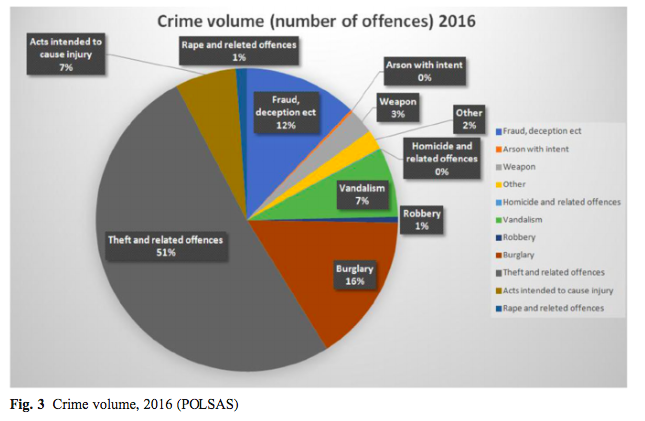

### 4) Explain in your own words: What is the problem with pie-charts?

Pie charts are a popular means of visualizing data, but they can present challenges when used to compare data points due to their reliance on angles for encoding information. As such, it is important to exercise caution when using pie charts to represent numerical data, and to consider alternative visualization methods.

One approach to improving the readability of pie charts is to include labels that show the percentage shares of the different slices of the chart. Additionally, it may be helpful to include an explanation box that provides information about the different colors used in the chart and the corresponding data they represent.

For example, in the pie chart presented in the article, the authors provide both percentage shares and labels for the different crime types, which enhances the readability and comparability of the chart. Furthermore, the inclusion of an explanation box that indicates which crime type corresponds to each color used in the chart can further improve its usefulness as a tool for visualizing numerical data.

## Part 3: Visualizing geodata using Plotly

### VEHICLE THEFT on Sundays

In [19]:
# Filtering the data to only retain records of vehicle thefts that occurred on Sundays, by DayOfWeek
df_vehicle_theft = df_focuscrimes[df_focuscrimes['Category'] == 'VEHICLE THEFT']
df_sunday = df_vehicle_theft[df_vehicle_theft["DayOfWeek"] == "Sunday"]

# Group data by police district
df_sunday = df_sunday.groupby(['PdDistrict'])['PdDistrict'].count().rename('Number of vehicle theft')

# Creating a choropleth map for vehicle thefts on sundays

# Retrieve the geojson data from a URL using urlopen and load it into a dictionary
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

counties["features"][0]

# Create a DataFrame containing the number of vehicle thefts for each police district on Sundays
df_sunday_map = pd.DataFrame(list(df_sunday.items()), columns=['PdDistrict', 'Number of vehicle theft'])

# Create a choropleth map
fig = px.choropleth_mapbox(df_sunday_map, geojson=counties, locations='PdDistrict', color='Number of vehicle theft',
                           color_continuous_scale="Viridis",
                           range_color=(0, 3000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.773972, "lon": -122.431297},
                           labels={'PDistrict'},
                           opacity=0.5,
                        )

# Update the layout of the plot

fig.update_layout(
    title={
        'text': "Vehicle thefts on sundays",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display the plot
fig.show()

### Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
The map shows that it is safest to park the car on a Sunday in the Tenderloin district, where there have been 356 vehicle thefts from 01-01-2003 to 31-12-2017. On the other hand, the worst place to park the car on a Sunday is in the Ingleside district, where there have been 2846 vehicle thefts in the same time period.

### Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?

In [20]:
# Creating a choropleth map for vehicle thefts on sundays where the range color is chanced to between zero and 1000

# Retrieve the geojson data from a URL using urlopen and load it into a dictionary
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

counties["features"][0]

# Create a DataFrame containing the number of vehicle thefts for each police district on Sundays
df_sunday_map = pd.DataFrame(list(df_sunday.items()), columns=['PdDistrict', 'Number of vehicle theft'])

# Create a choropleth map
fig = px.choropleth_mapbox(df_sunday_map, geojson=counties, locations='PdDistrict', color='Number of vehicle theft',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.773972, "lon": -122.431297},
                           labels={'PDistrict'},
                           opacity=0.5,
                          )


# Update the layout of the plot

fig.update_layout(
    title={
        'text': "Vehicle thefts on sundays",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display the plot
fig.show() 

In the plot above, color is used to represent the different number of vehicle thefts, but in this example the range of color is changed to between zero and 1000. Since the number of crimes in most of the districts is above 1000, you can't see the differences between the districts on this map. This shows that if the color range is not well chosen, et can lead to misinterpretation of the data. 


### Why do you think perceptual errors are a problem? Try to think of a few examples.

Perceptual errors can pose a problem since they can result in inaccurate conclusions and decisions based on the data being viewed. In our previous example, where color was used to depict the number of vehicle thefts, people may assume that darker colors indicate a higher number of vehicle thefts, even though that is not the case in this scenario. This misconception may lead people to believe that it is safer to park their car in a high-theft district.

Another common encoding method is to use bar charts as we have done previous. A perceptual error here could be if the y-axis of the chart does not start at zero, it can distort the perception of the differences between the bars. For instance, a small difference between two bars may appear much larger than it actually is if the y-axis is truncated. This can lead to incorrect conclusions about the relative between the crimetypes, weekdays and so on. Therefore, it's important to choose an encoding method that does not introduce visual distortions, such as using a y-axis that starts at zero or using a different visualization method that is not susceptible to this type of perceptual error.

# A1 Part 4: Errors in the data

### 1) In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data.

##### 1. PROSTITUTION incidents on Thursdays
The temporal activity graph for PROSTITUTION incidents (Part 2, Week 4) lacks axis labels and a title, which hinders the interpretation of whether it represents the weekly pattern or just the pattern for Thursdays.

However, assuming that the graph is based on weekly data that is not aggregated, it is clear that there is a significant outlier on Thursdays that is influencing the overall result, suggesting that Thursday has the highest number of PROSTITUTION incidents.

The cause of this outlier is uncertain, but one possible explanation is a flaw in the registration system batch process that overrides the timestamp on registrations made before 12:00 pm on Thursdays and automatically sets it to 12:00 pm. This could clarify why 12:00 pm on Thursdays is a particularly popular time for registering PROSTITUTION incidents, and why this period stands out in comparison to the number of incidents recorded on Thursdays at 12:00 pm for other crime types.

##### 2. Crimes recorded on round number timestamps (fx on the hour, 15 minutes past the hour and so on)

If we haven't looked at the jitter plots but binned the data, this error would have affected the distribution of the data in each bin. In this case, the bins corresponding to the round numbers would have been overrepresented compared to other bins. A histogram or bar plot would have hidden the patterns shown in the jitter plot, which could have led to biased conclusions drawn from the binned data. People may have believed that crimes mostly happen on the hour or 30 minutes past the hour, despite this not being true.

##### 3. Hall of Justice seems to be hot spot for sex offences
The Hall of Justice is a publicly accessible facility in San Francisco that accommodates a court room and a jail, as explicitly stated on the San Francisco Superior Court website (source: https://www.sfsuperiorcourt.org/general-info/directions/hall-of-justice). However, recent reports have emerged detailing several instances of sexual offenses that have occurred within the premises of this building. It is conceivable that errors may have occurred in the documentation of these offenses, and the address of the Hall of Justice could have been mistakenly recorded as the location of the incidents due to the individuals responsible for recording them being employed within the building.

It is essential to recognize the possibility of such errors, as failing to do so could lead to a distorted understanding of the true nature and location of criminal activity within San Francisco.

### 2) Mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

Failing to notice these errors can lead to misunderstandings about forexample which day, district, or time crimes occur in San Francisco. This, in turn, can result in incorrect political decisions regarding the allocation of police resources to certain districts, while ignoring other districts. Additionally, it can create a false impression for people residing in these districts. People living in these districts may have a false impression of crime rates, which can affect their behavior, quality of life, and perception of their neighborhood. For example, if people believe that crime rates are higher than they actually are, they may be more likely to avoid certain areas or take extra precautions, such as avoiding going out at night.

### 3) Find your own example of human noise in the data and visualize it.

A discovery of human noise within the data is illustrated by the latitude and longitude coordinates. 

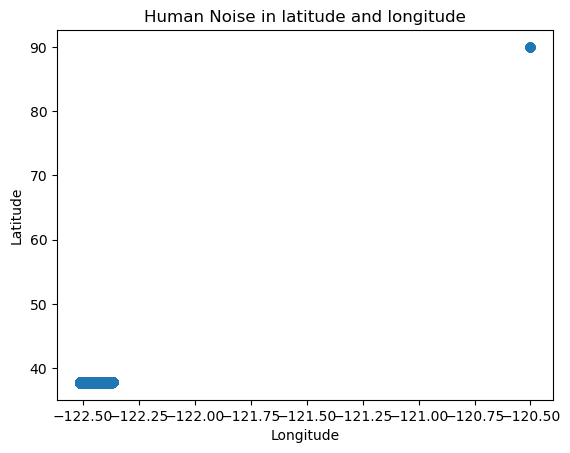

In [23]:
plot.scatter(df_focuscrimes['X'], df_focuscrimes['Y'])
plot.xlabel('Longitude')
plot.ylabel('Latitude')
plot.title('Human Noise in latitude and longitude')
plot.show()

The scatterplot indicates the presence of outliers, which upon further investigation, revealed identical coordinates (90, -120.50000000000001). This specific location resides in the Arctic Ocean, near the North Pole which is not a location where many people reside or have addresses.

The reasoning behind this is unclear, but it is possible that when an address is unknown, the system automatically assigns these coordinates.

To ensure the accuracy of the data, it is important to identify and address outliers in the dataset. In this case, the presence of outliers in the latitude and longitude coordinates could have resulted in inaccurate analyses based on location. Therefore, it is important to be aware of these outliers and take steps to address them, such as removing them from the dataset or imputing more accurate values if possible. 